# Introduction to Insider Trading (pre-proposal workbook)

This is a basic notebook to get us started. It will run through the code of mounting to our project drive and folder. It will then try to access some of our data files. Please feel free to open edit and adjust as you see fit. Normally, I like to have an intial code block to import all libraries and modules, but for now I am going to keep the module with the code that is using it. We can come back and clean this up when everyone is comfortable with what we are doing.


In [1]:
#Start by importing drive from google.colab
from google.colab import drive
#Mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now that we have mounted our drive we can navigate to the working directory for our project files. This may be different for each of us based on how we have our drive set up so I am going to make it easy for each of us to comment in our unique path

In [2]:
import os

#Students Google Drive Path
toms_path = '/content/drive/MyDrive/Colab Notebooks/593 - Milestone I/593 - Insider Trading Milestone I Project'
kirts_path = None
ramis_path = None

#Navigate to the right working directory and confirm our current working drive
os.chdir(toms_path)
#os.chdir(kirts_path)
#os.chdir(ramis_path)
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/593 - Milestone I/593 - Insider Trading Milestone I Project


Now that we have navigated to the proper parent folder let's take a quick image of all of the dependencies and versions that we are currently using in our google colab notebook for reproducibility.

In [33]:
#print the dependencies in the notebook
!pip freeze

#create a .txt file that contains all versions
#!pip freeze > colab_requirements.txt

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.28.0.37.27
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
commun

Now, let's see if we can unzip the directory so that we can access one of the .tsv files using pandas.

In [3]:
import zipfile

#Where is our sample zip file?
zip_path = '2025q1_form345.zip'
#Let's extract all files to it's own directory
extract_dir = '2025q1_unzipped'

#Let's pull out all of the files
with zipfile.ZipFile(zip_path, "r") as zip:
    #Take a look at a list of the files
    print(zip.namelist())

    #Now we can extract all of the files to our directory
    #zip.extractall(path=extract_dir) #Uncomment this line to extract

['DERIV_HOLDING.tsv', 'DERIV_TRANS.tsv', 'FOOTNOTES.tsv', 'NONDERIV_HOLDING.tsv', 'NONDERIV_TRANS.tsv', 'OWNER_SIGNATURE.tsv', 'REPORTINGOWNER.tsv', 'SUBMISSION.tsv', 'FORM_345_metadata.json', 'FORM_345_readme.htm']


Looks like we have about 10 files that we can work with. I agree with Kirt, the three primary files we will want to read in are 'NONDERIV_TRANS.tsv' for non derivative transactions, 'REPORTINGOWNER.tsv' to get the information on the insider and 'SUBMISSION.tsv'. So, let's start by looking at the REPORTINGOWNER.tsv file

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Let's use read_csv but indicate the seperator is a tab
rep_own_df = pd.read_csv('2025q1_unzipped/REPORTINGOWNER.tsv', sep = '\t')

print(f"We are dealing with {rep_own_df.shape[0]} rows of data and {rep_own_df.shape[1]} columns\n")
print(f"The unique column names are {rep_own_df.columns}\n")
print(f"Let's take a look at the first few rows of the dataframe: \n{rep_own_df.head()}")

We are dealing with 66287 rows of data and 13 columns

The unique column names are Index(['ACCESSION_NUMBER', 'RPTOWNERCIK', 'RPTOWNERNAME',
       'RPTOWNER_RELATIONSHIP', 'RPTOWNER_TITLE', 'RPTOWNER_TXT',
       'RPTOWNER_STREET1', 'RPTOWNER_STREET2', 'RPTOWNER_CITY',
       'RPTOWNER_STATE', 'RPTOWNER_ZIPCODE', 'RPTOWNER_STATE_DESC',
       'FILE_NUMBER'],
      dtype='object')

Let's take a look at the first few rows of the dataframe: 
       ACCESSION_NUMBER  RPTOWNERCIK                        RPTOWNERNAME  \
0  0001104659-25-030101      1449434    Apollo Management Holdings, L.P.   
1  0001104659-25-030101      1449433  Apollo Management Holdings GP, LLC   
2  0001104659-25-030101      1413410           Apollo Management GP, LLC   
3  0001104659-25-030099      1784683          Apollo Management IX, L.P.   
4  0001104659-25-030099      1934842     College Parent Holdings GP, LLC   

  RPTOWNER_RELATIONSHIP RPTOWNER_TITLE RPTOWNER_TXT  \
0       TenPercentOwner            NaN      

Great, we are able to pull in data on the drive and quickly take a look at some of the important information. A lot of this data is categorical, but let's quickly look at the distribution of cities in our dataset.


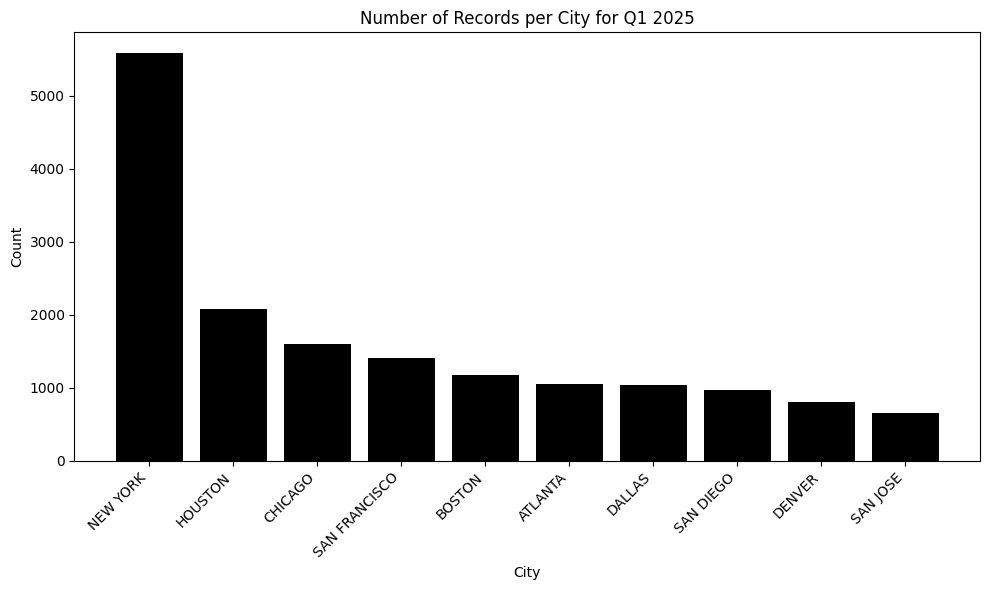

In [24]:
#Let's get counts based on cities
counts = rep_own_df['RPTOWNER_CITY'].value_counts()
#print(counts)

#Let's plot this as a basic histogram of the top 10 cities
plt.figure(figsize=(10,6))
plt.bar(counts.index[:10], counts.values[:10], color = 'black')

#Let's annotate it for clarity
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Records per City for Q1 2025')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Let's take a look
plt.show()

This is interesting but let's also take a look at some of the data in these other files. Next, I think we should look at the non derivative transactions and see what type of data is kept in there.


In [31]:
#Let's use read_csv but indicate the seperator is a tab. There is a dtype error
#so lets use low_memory = False
trans_df = pd.read_csv('2025q1_unzipped/NONDERIV_TRANS.tsv', low_memory = False, sep = '\t')

print(f"There are {trans_df.shape[0]} rows of data with {trans_df.shape[1]} columns\n")

print(f"Dataframe info: \n{trans_df.info()}")

print(f"let's take a look at a quick sample of the data: \n{trans_df.sample(5)}")

There are 103029 rows of data with 28 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103029 entries, 0 to 103028
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ACCESSION_NUMBER              103029 non-null  object 
 1   NONDERIV_TRANS_SK             103029 non-null  int64  
 2   SECURITY_TITLE                103029 non-null  object 
 3   SECURITY_TITLE_FN             2904 non-null    object 
 4   TRANS_DATE                    103029 non-null  object 
 5   TRANS_DATE_FN                 561 non-null     object 
 6   DEEMED_EXECUTION_DATE         1037 non-null    object 
 7   DEEMED_EXECUTION_DATE_FN      63 non-null      object 
 8   TRANS_FORM_TYPE               103028 non-null  float64
 9   TRANS_CODE                    103028 non-null  object 
 10  EQUITY_SWAP_INVOLVED          103028 non-null  object 
 11  EQUITY_SWAP_TRANS_CD_FN       25669 non-null   object 
 1